<a href="https://colab.research.google.com/github/smaranjitghose/Zomato_HORECA_EDA/blob/main/notebooks/Zomato_Cafe_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q wordcloud

In [2]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from matplotlib import pyplot as plt
from PIL import Image

In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
zomato_cafe_data = "/content/reviews.csv"

In [4]:
zomato_df = pd.read_csv(zomato_cafe_data,index_col=0)
zomato_df.head(6)

,Name,Overall_Rating,Cuisine,Rate for two,City,Review
Index,,,,,,
0,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,Been to this place 3-4 times. Prakash is alway...
1,Oliver Brown,3.9,"Cafe, Coffee, Shake, Juices, Beverages, Waffle...",500,ahmedabad,I recently visited Oliver Brown on a weekend f...
2,Crush Coffee,3,"Cafe, Shake, Beverages, Desserts",600,ahmedabad,Very watery ans thin shake
3,The Mohalla,3.8,Cafe,550,ahmedabad,it was not cheese burst pizza.. only cheeze wa...
4,The Mohalla,3.8,Cafe,550,ahmedabad,"Yammi.,....test burger is best I love 💗 this B..."
5,The Shaka Cafe,4.3,"North Indian, Pizza, Asian, Chinese, Cafe, Des...","1,200",ahmedabad,"food was not spicy , which I was told to resto..."


In [5]:
# Check for missing data
zomato_df.isnull().sum()

Name              0
Overall_Rating    0
Cuisine           0
Rate for two      0
City              0
Review            0
dtype: int64

In [6]:
# List out the columns
zomato_df.columns

Index(['Name', 'Overall_Rating', 'Cuisine', 'Rate for two', 'City', 'Review'], dtype='object')

In [8]:
# Number of cities
zomato_df["City"].unique()

array(['ahmedabad', 'mumbai', 'pune', 'bangalore', 'udaipur', 'jaipur',
       'surat', 'indore', 'chennai', 'chandigarh'], dtype=object)

In [9]:
desired_city = "ahmedabad"

In [12]:
res = zomato_df[zomato_df['City']==desired_city]['Review']
res

Index
0     Been to this place 3-4 times. Prakash is alway...
1     I recently visited Oliver Brown on a weekend f...
2                            Very watery ans thin shake
3     it was not cheese burst pizza.. only cheeze wa...
4     Yammi.,....test burger is best I love 💗 this B...
                            ...                        
95    The burgers are juicy, crisp, authentic and ta...
96        Black plastic found in chhole..image attached
97    The best cafe in the town! The coffee is amazi...
98    Food quality was not good. Not found any panee...
99    All the food spilled in the bag. Similar revie...
Name: Review, Length: 100, dtype: object

In [ ]:
# Number of review available
len(res)

In [13]:
# Combine the reviews into a single text chunk
review_txt = " ".join(res.tolist())
review_txt

'Been to this place 3-4 times. Prakash is always very sweet and accommodating. Plus always ask Vaibhav to make your shakes, they are perfect!! I recently visited Oliver Brown on a weekend for a cup of iced coffee, and I was thoroughly impressed. The ambience was inviting, the seating comfortable, and the service top-notch. I had the pleasure of trying their iced coffee and dark hot chocolate, both of which were absolutely delicious. It\'s an excellent place overall, and I\'m already looking forward to my next visit Very watery ans thin shake it was not cheese burst pizza.. only cheeze was on the top.. not happy with the pizza sent made today Yammi.,....test burger is best I love 💗 this BergerAnd fry is also missing 😂Love ❤️ you ........ food was not spicy , which I was told to restorant on call and instructions.  Punjabi Thali is great. The taste was good and paratha was the star. The reason simple being provided instead of maida made Naan. So overall mindful serving to customer and li

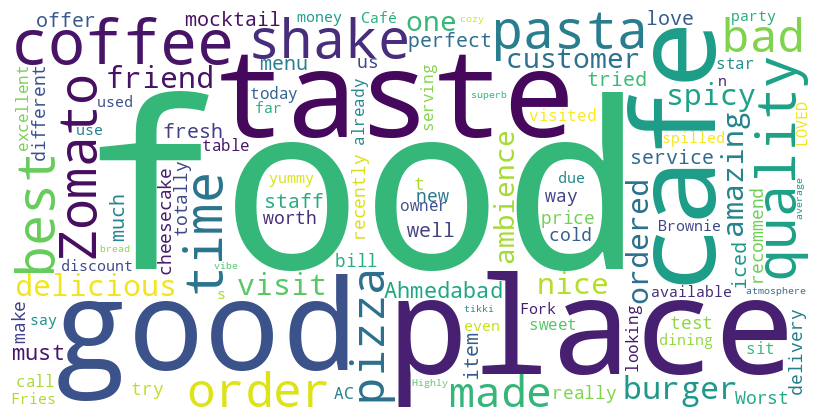

In [14]:
# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      min_font_size=10).generate(review_txt)

# Plot Word Cloud
plt.figure(figsize=(8, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()